# Decision tree for Company data

In [80]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier,plot_tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data set
tree=pd.read_csv(r'C:/Users/admin/OneDrive/Desktop/Company_Data.csv')
tree

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

# Exploratory data analysis(EDA)

In [3]:
#check the dataset shape
tree.shape

(400, 11)

In [4]:
#check any null values is there
tree.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
# describe the data
tree.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [6]:
# information of dataset
tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
# check any duplicated values is there in data set
tree.duplicated().any()

False

# Feature Engineering

In [8]:
tree.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

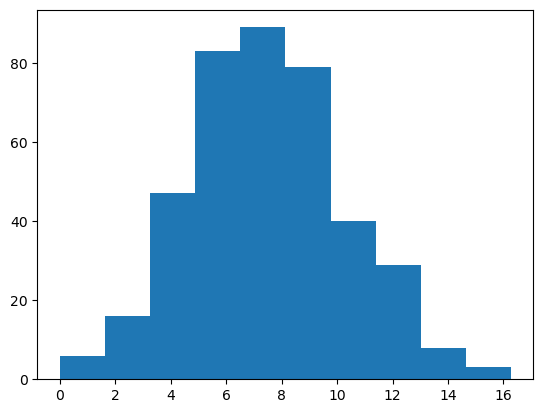

In [9]:
plt.hist('Sales',data=tree)
plt.show()

#As the Sales distribution is not skewed and it is normal distribution we can take mean or median as a threshold to make two or three categories 'Low', 'Medium' and 'High' Sales
# For two categories lets assume: Sales < 7.5 as “Bad=0” and Sales > 7.5 as “Good=1”
#and For three categories lets divide the Sales values with Quartiles , less than first quartile as 'Low' , between Second Quartile as 'Medium and above Third Quartile as 'High'

In [10]:
tree1=tree.copy()
tree1['Sales_cat'] = pd.cut(x = tree1['Sales'], bins = [0,5.39,9.32,17], labels=['Low','Medium','High'], right = False)
tree1.head()


Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US Sales_cat  
0         17   Yes  Yes      High  
1         10   Yes  Yes      High  
2         12   Yes  Yes      High  
3         14   Yes  Yes    Medium  
4         13   Yes   No       Low

In [11]:
tree1.Sales_cat.value_counts()

Medium    198
High      102
Low       100
Name: Sales_cat, dtype: int64

In [12]:
tree1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    object  
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    object  
 10  US           400 non-null    object  
 11  Sales_cat    400 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 35.0+ KB


In [13]:
categorical_features = tree1.describe(include=["object",'category']).columns
categorical_features

Index(['ShelveLoc', 'Urban', 'US', 'Sales_cat'], dtype='object')

In [14]:
numerical_features = tree1.describe(include=["int64","float64"]).columns
numerical_features

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

# Data Visualization

Sales


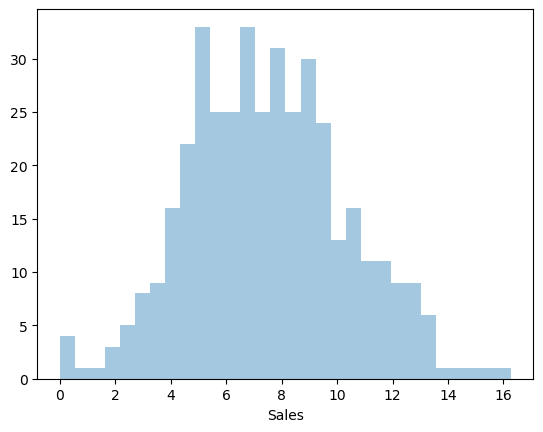

CompPrice


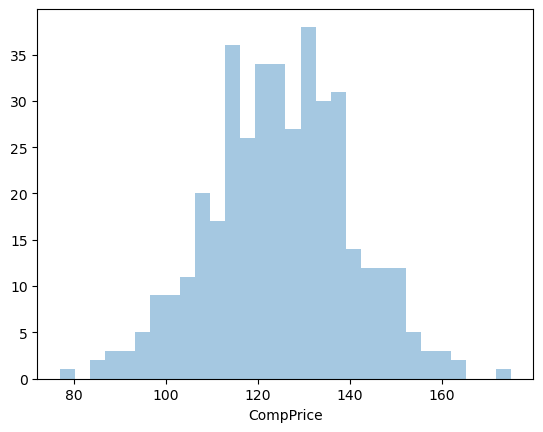

Income


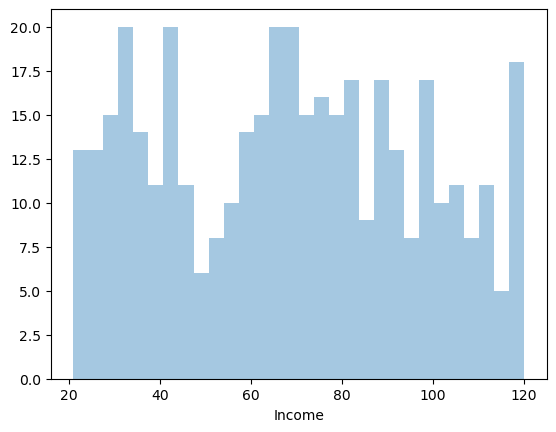

Advertising


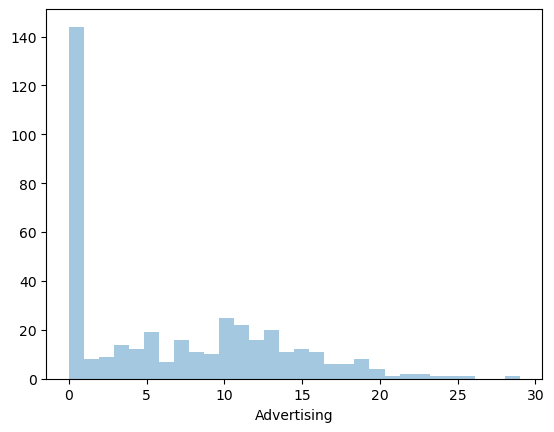

Population


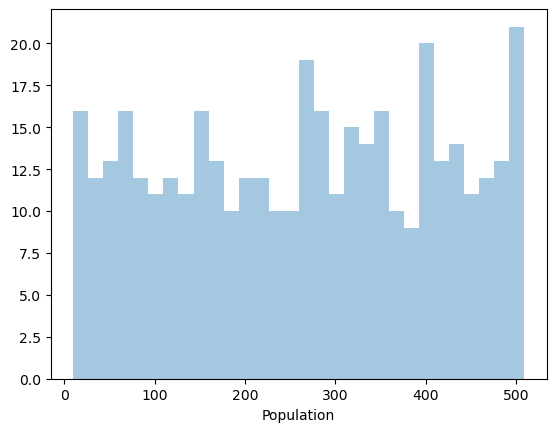

Price


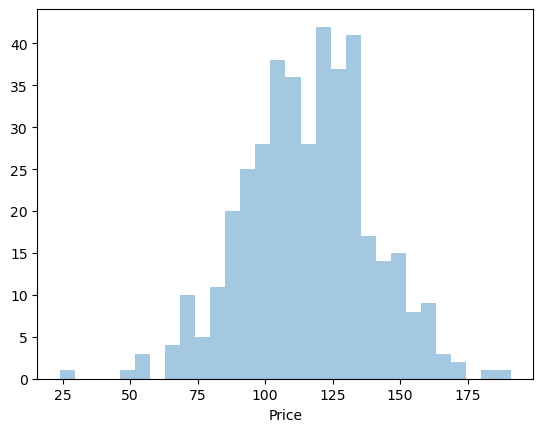

Age


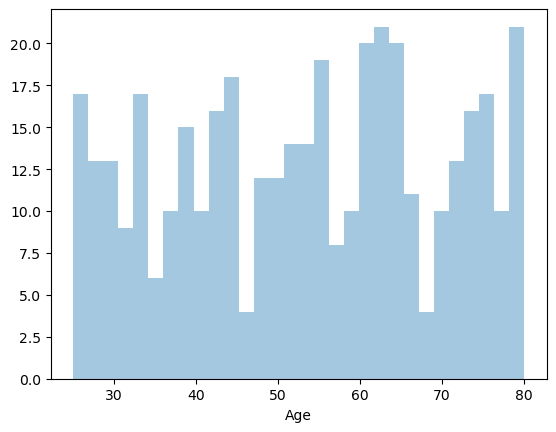

Education


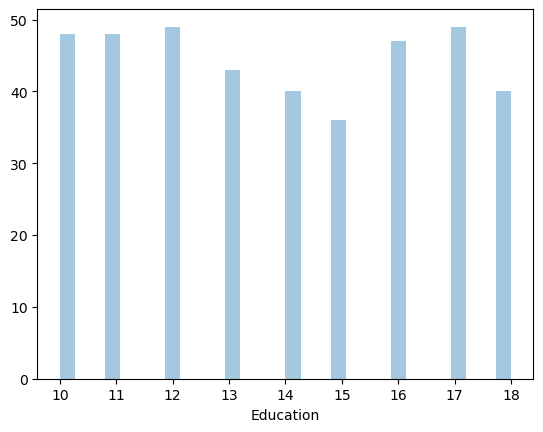

In [15]:
numerical_features=[feature for feature in tree.columns if tree[feature].dtype !='O']
for i in numerical_features:
    print(i)
    skew = tree[i].skew()
    sns.distplot(tree[i],kde=False,label='Skew = %.3f' %(skew), bins=30)
    plt.show()

# Treating outliers

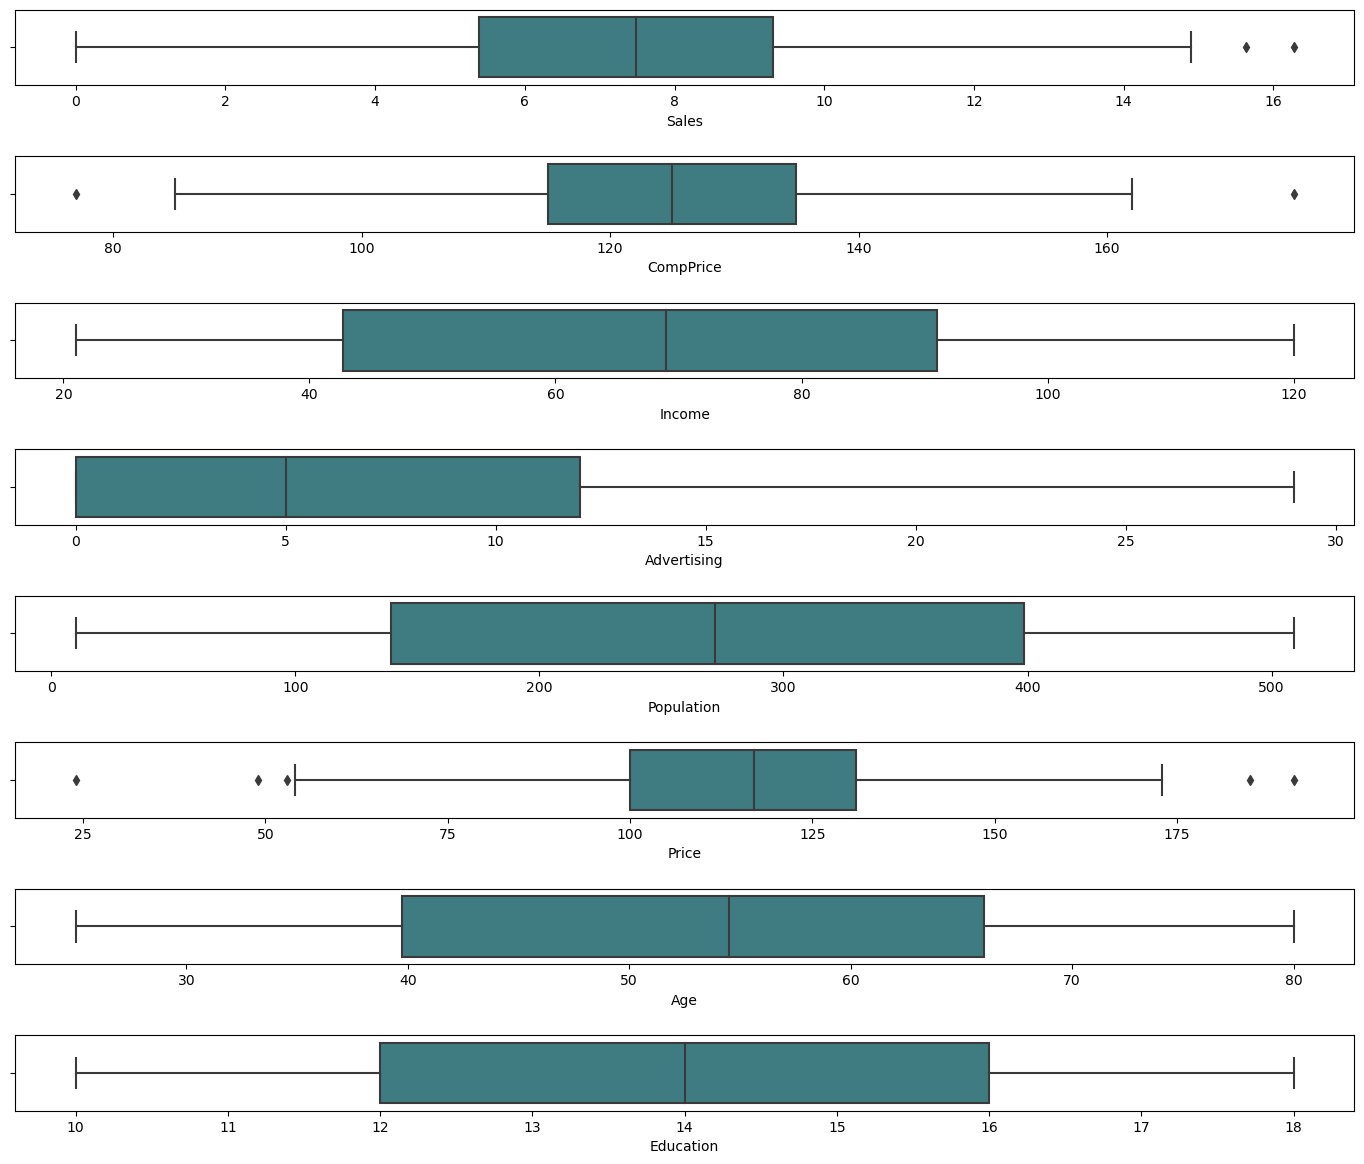

In [16]:
ot=tree.copy() 
fig, axes=plt.subplots(8,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='Sales',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='CompPrice',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Income',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Advertising',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Population',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Price',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Age',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Education',data=ot,palette='crest',ax=axes[7])
plt.tight_layout(pad=2.0)

<Axes: >

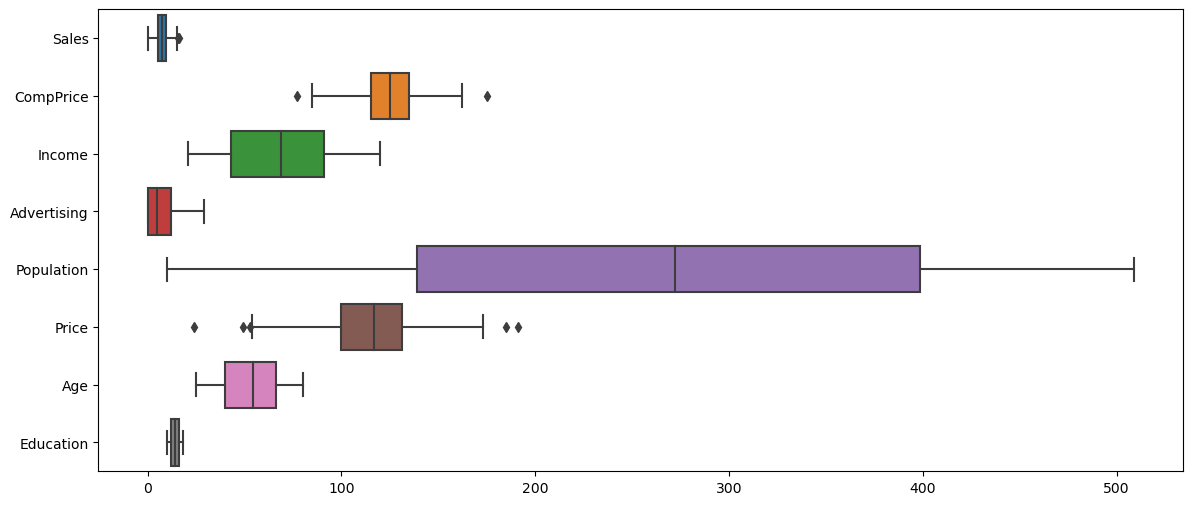

In [17]:
#outlier
plt.figure(figsize=(14,6))
sns.boxplot(data=tree[numerical_features], orient="h")

#Unsurprisingly, Population has a mean that is much superior to the other constituents as we already saw in the previous section.

# Multivariate Analysis

<Figure size 800x800 with 0 Axes>

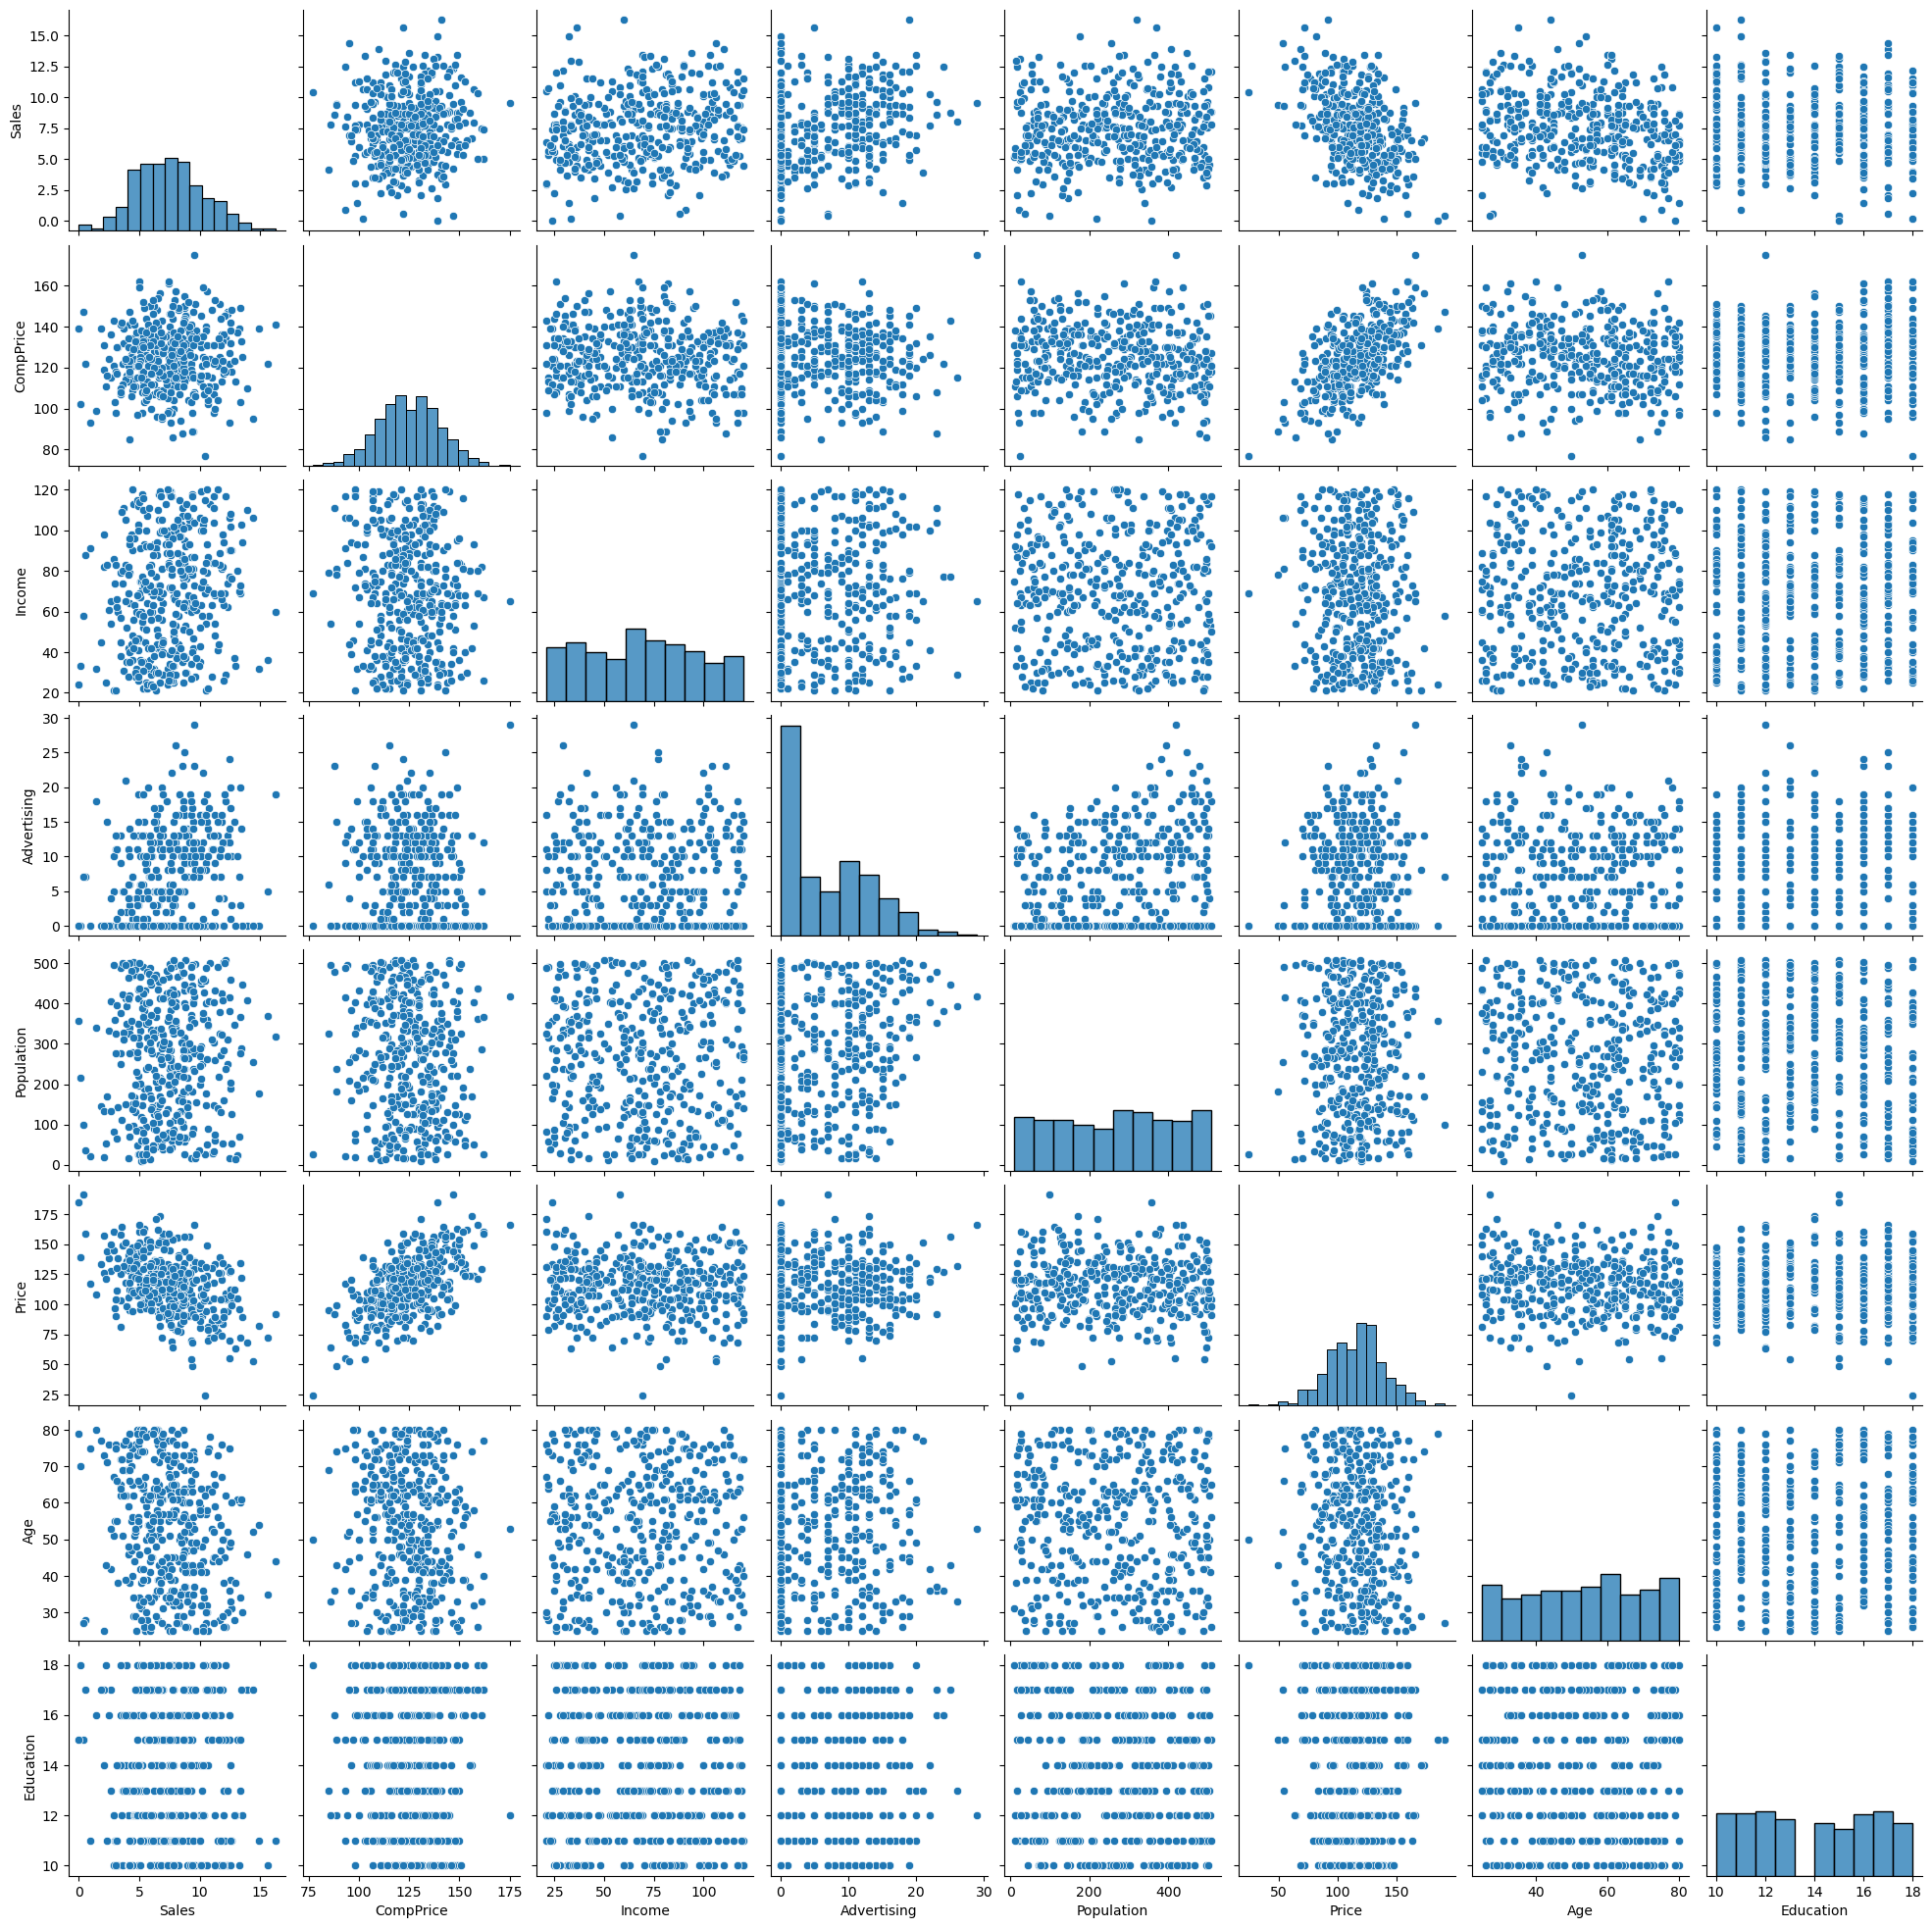

In [18]:
plt.figure(figsize=(8,8))
sns.pairplot(tree, palette='coolwarm')
plt.show()

<Axes: >

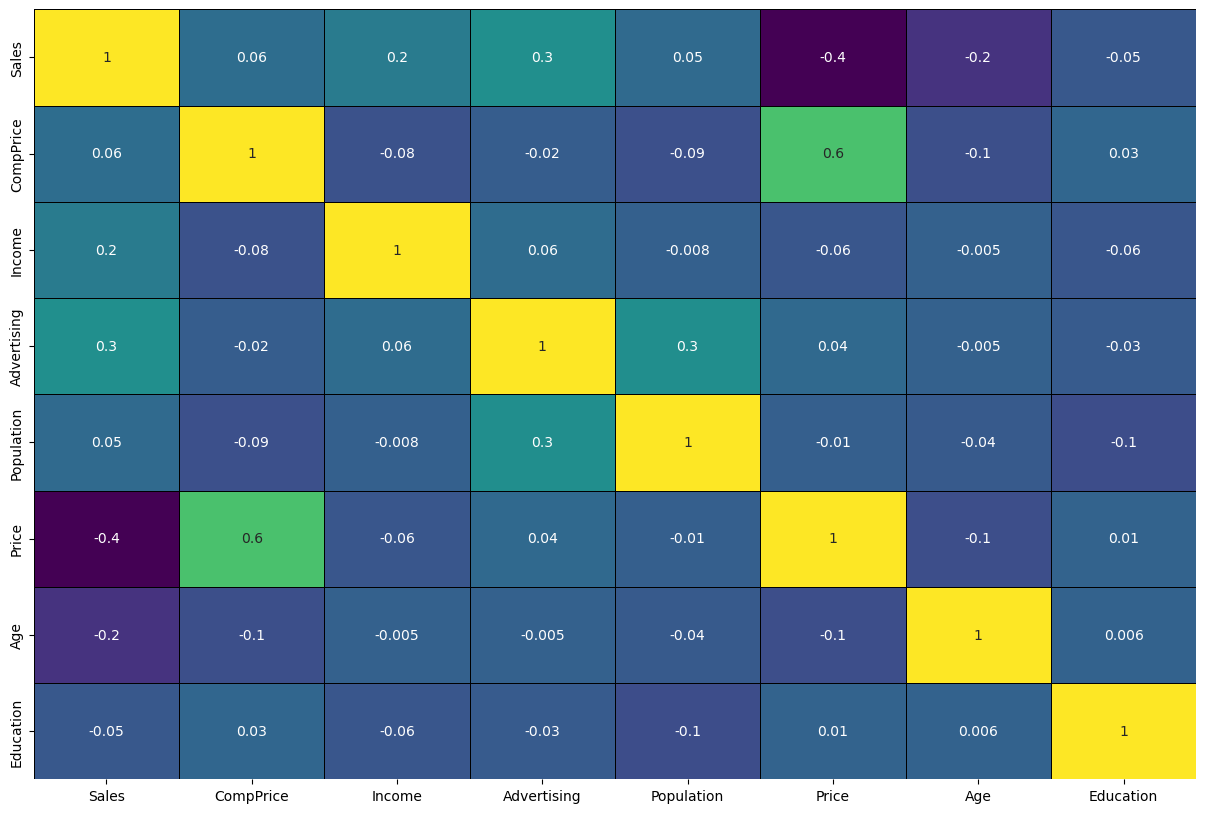

In [19]:
# Having a look at the correlation matrix

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(tree.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

Index(['ShelveLoc', 'Urban', 'US', 'Sales_cat'], dtype='object')


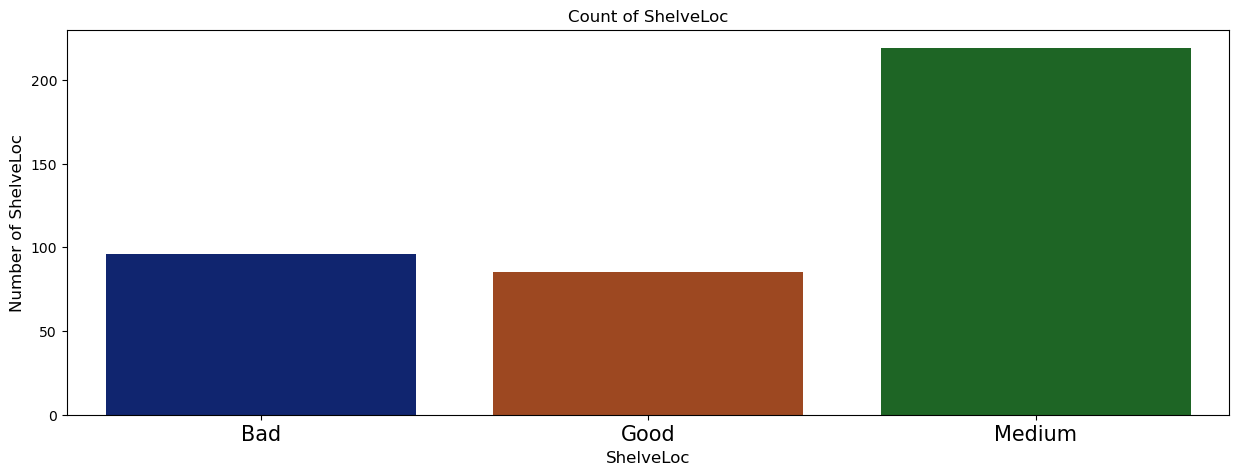

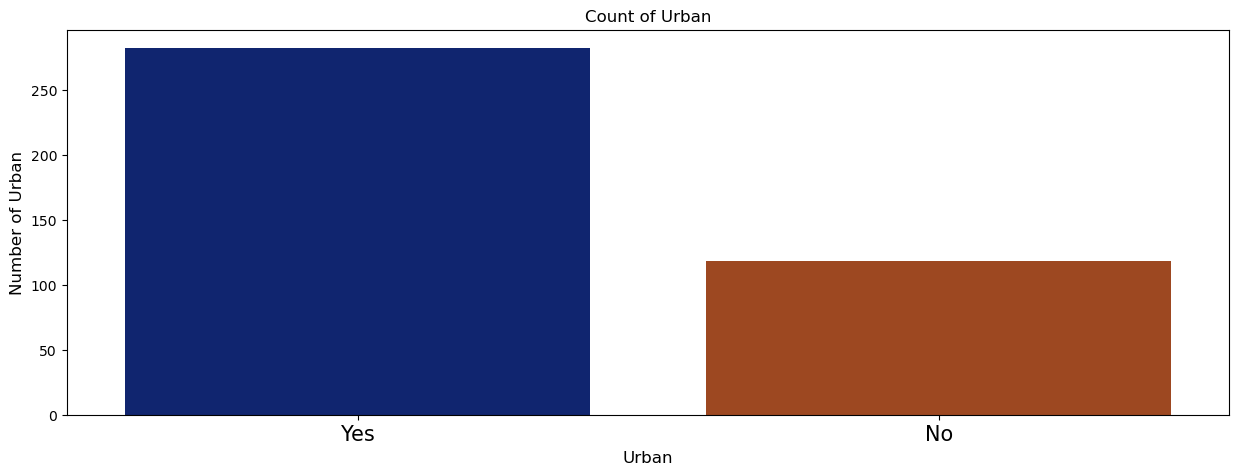

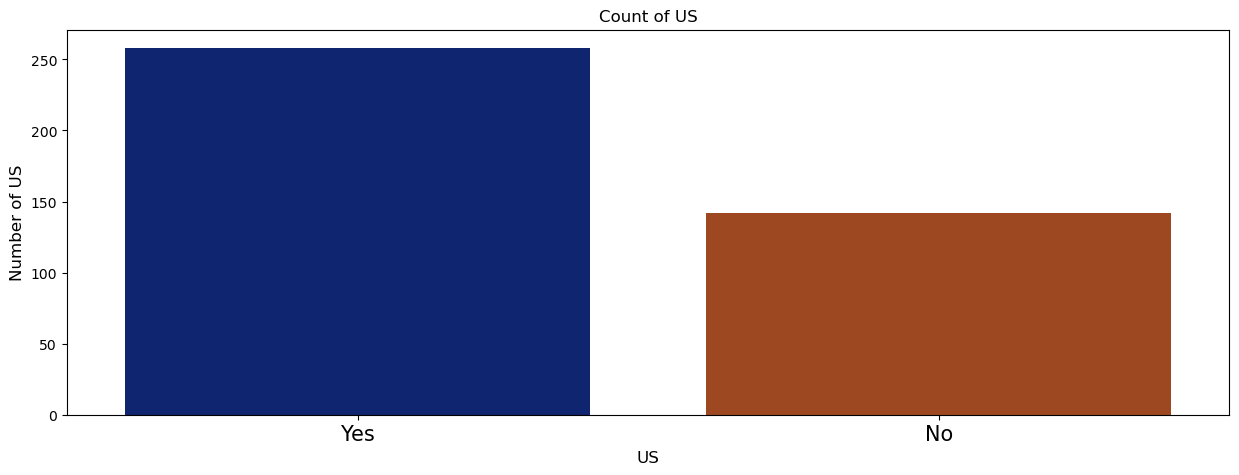

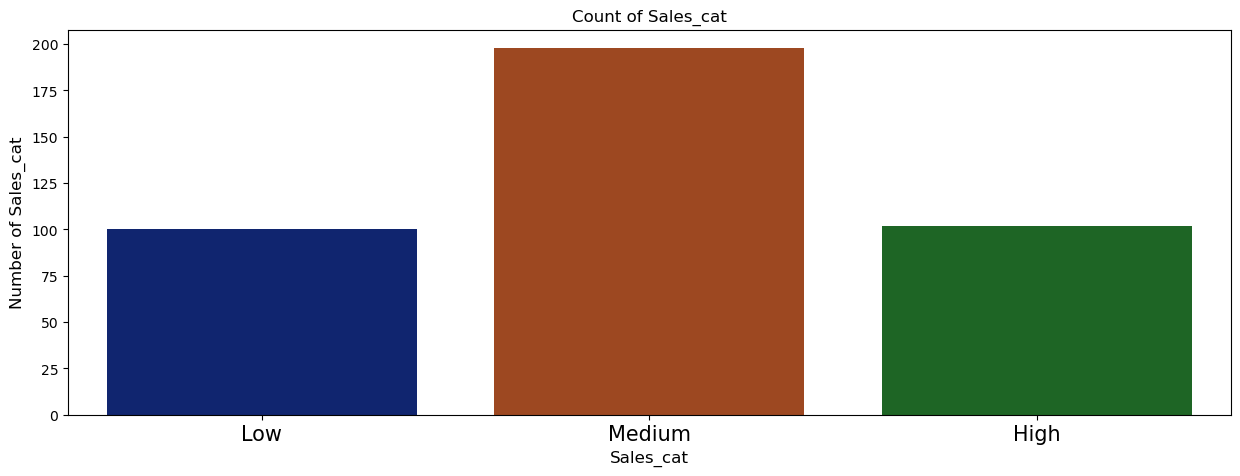

In [20]:
print(categorical_features)

for idx, column in enumerate(categorical_features):
    plt.figure(figsize=(15, 5))
    unique = tree1[column].value_counts(ascending=True);
 
    #plt.subplot(1, len(categorical_features), idx+1)    
    plt.title("Count of "+ column)
    sns.countplot(data=tree1, x=column,palette = "dark")
    #plt.bar(unique.index, unique.values);
    plt.xticks(rotation = 0, size = 15)
    
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)

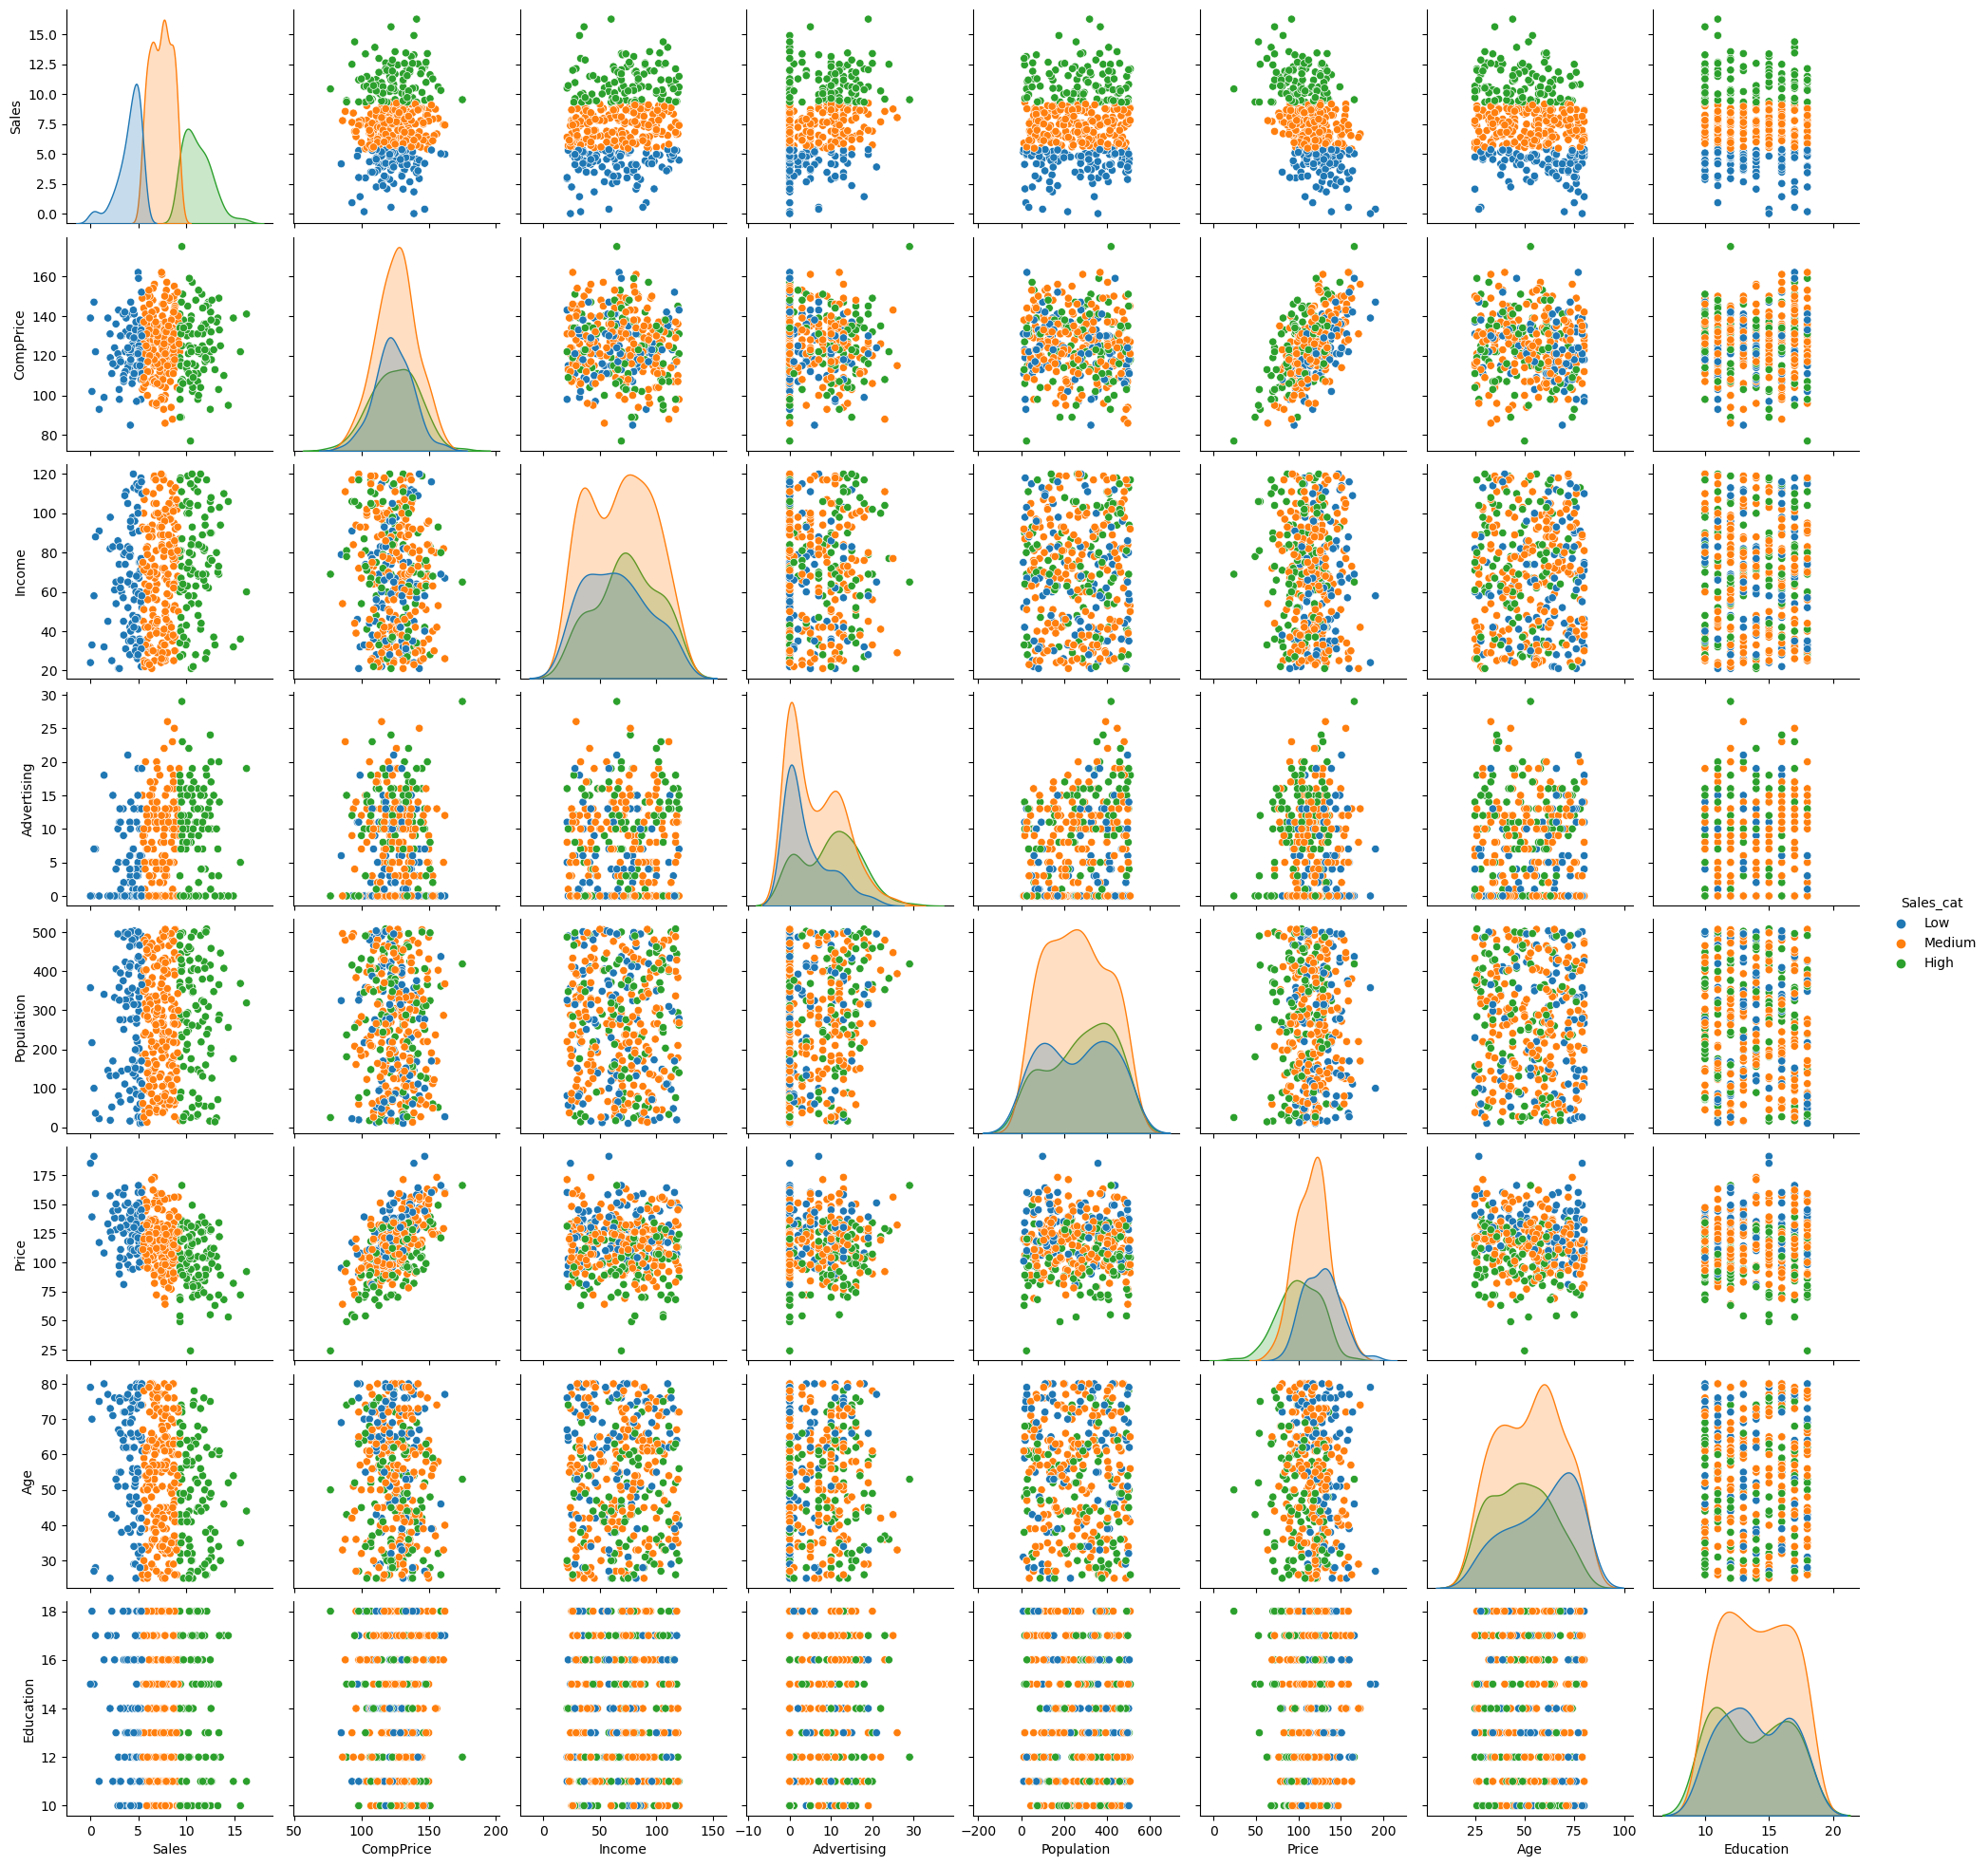

In [21]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=tree1, hue = 'Sales_cat')

In [22]:
data_ = tree1.copy()
data_.drop('Sales',axis=1, inplace =True)
data_ = pd.get_dummies(data_.iloc[:,:-1])
data_.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  
0      0       1  
1      0       1  
2      0       1  
3      0       1  
4      1       0

Text(0.5, 1.0, 'Correlation with Sales \n')

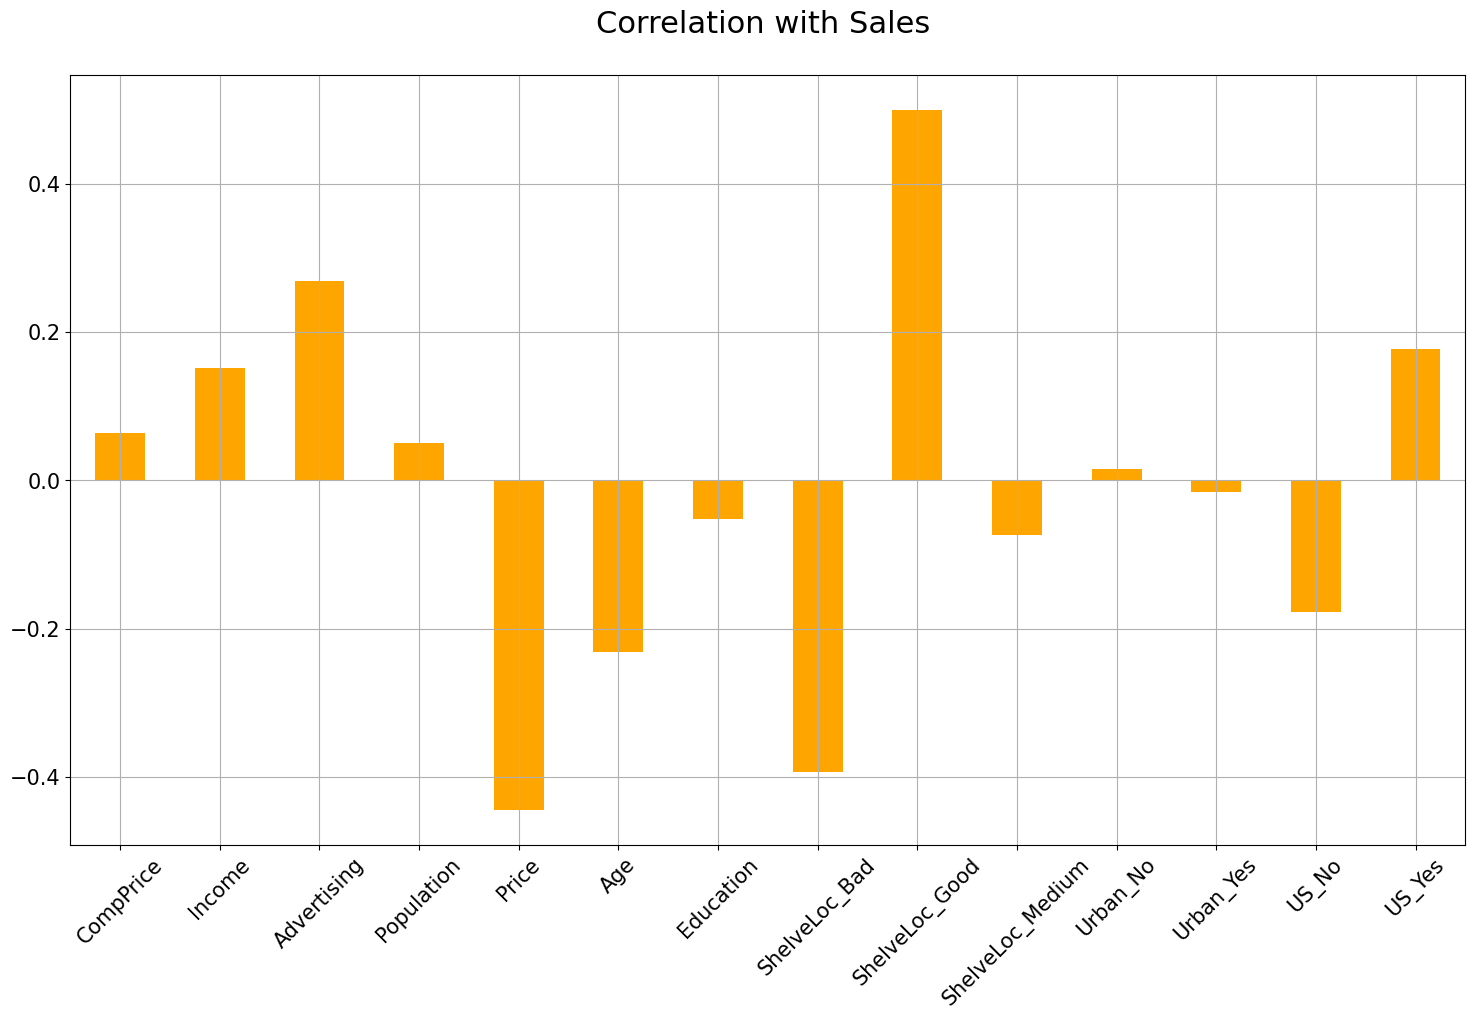

In [23]:
data2 = data_.copy()

correlations = data2.corrwith(tree1.Sales)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'orange',
        rot = 45, grid = True)
plt.title('Correlation with Sales \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

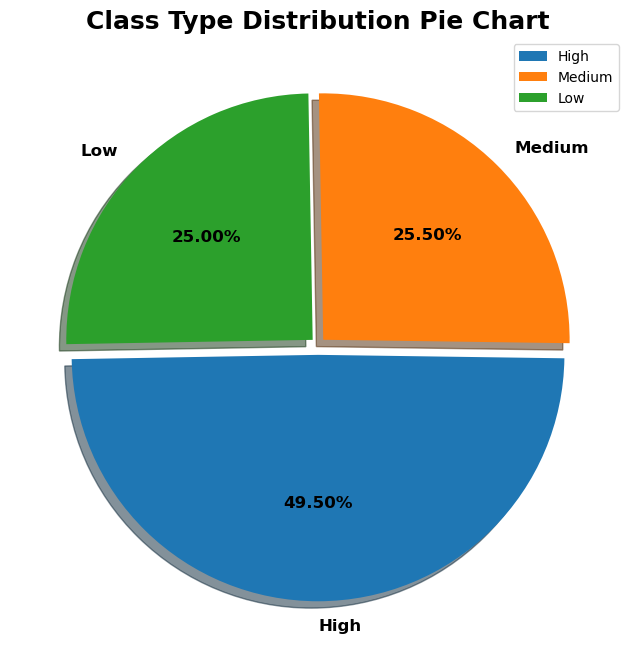

In [24]:
plt.figure(figsize = (12,8))
plt.pie(tree1['Sales_cat'].value_counts(),
       labels=tree1.Sales_cat.unique(),
       explode = [0.04,0.03,0.03],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 181,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'horizontal',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

# Data Pre-Processing

In [25]:
data_ = tree1.copy()
data_.drop('Sales',axis=1, inplace =True)
data_ = pd.get_dummies(data_.iloc[:,:-1])
data_.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  
0      0       1  
1      0       1  
2      0       1  
3      0       1  
4      1       0

In [26]:
data_['Sales'] = tree1.Sales_cat
data_.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes   Sales  
0      0       1    High  
1      0       1    High  
2      0       1    High  
3      0       1  Medium  
4      1       0     Low

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data_["Sales"])
data_["Sales"]=le.transform(data_["Sales"])
data_.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  Sales  
0      0       1      0  
1      0       1      0  
2      0       1      0  
3      0       1      2  
4      1       0      1

In [28]:
data_['Sales'].value_counts()

2    198
0    102
1    100
Name: Sales, dtype: int64

In [29]:
features=data_.drop('Sales',axis=1)
features

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0          138      73           11         276    120   42         17   
1          111      48           16         260     83   65         10   
2          113      35           10         269     80   59         12   
3          117     100            4         466     97   55         14   
4          141      64            3         340    128   38         13   
..         ...     ...          ...         ...    ...  ...        ...   
395        138     108           17         203    128   33         14   
396        139      23            3          37    120   55         11   
397        162      26           12         368    159   40         18   
398        100      79            7         284     95   50         12   
399        134      37            0          27    120   49         16   

     ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0                1               0                 0         0          1   
1                0               1                 0         0          1   
2                0               0                 1         0          1   
3                0               0                 1         0          1   
4                1               0                 0         0          1   
..             ...             ...               ...       ...        ...   
395              0               1                 0         0          1   
396              0               0                 1         1          0   
397              0               0                 1         0          1   
398              1               0                 0         0          1   
399              0               1                 0         0          1   

     US_No  US_Yes  
0        0       1  
1        0       1  
2        0       1  
3        0       1  
4        1       0  
..     ...     ...  
395      0       1  
396      0       1  
397      0       1  
398      0       1  
399      0       1  

[400 rows x 14 columns]

# Applying Standardscaler for numerical features

In [49]:
from sklearn.preprocessing import StandardScaler,RobustScaler,Normalizer,MinMaxScaler
std_scl=StandardScaler()


In [50]:
cols=['CompPrice','Income','Advertising','Population','Price','Age','Education']

In [51]:
std=pd.DataFrame(std_scl.fit_transform(features.iloc[:,:7]),columns=cols)
std

CompPrice    Income  Advertising  Population     Price       Age  \
0     0.850455  0.155361     0.657177    0.075819  0.177823 -0.699782   
1    -0.912484 -0.739060     1.409957   -0.032882 -1.386854  0.721723   
2    -0.781896 -1.204159     0.506621    0.028262 -1.513719  0.350895   
3    -0.520720  1.121336    -0.396715    1.366649 -0.794814  0.103677   
4     1.046337 -0.166631    -0.547271    0.510625  0.516132 -0.947000   
..         ...       ...          ...         ...       ...       ...   
395   0.850455  1.407551     1.560513   -0.420131  0.516132 -1.256023   
396   0.915749 -1.633482    -0.547271   -1.547909  0.177823  0.103677   
397   2.417512 -1.526151     0.807733    0.700853  1.827078 -0.823391   
398  -1.630719  0.370022     0.054953    0.130170 -0.879391 -0.205346   
399   0.589279 -1.132606    -0.998939   -1.615848  0.177823 -0.267150   

     Education  
0     1.184449  
1    -1.490113  
2    -0.725953  
3     0.038208  
4    -0.343872  
..         ...  
395   0.038208  
396  -1.108033  
397   1.566529  
398  -0.725953  
399   0.802369  

[400 rows x 7 columns]

In [52]:
features['CompPrice']=std['CompPrice']
features['Income']=std['Income']
features['Advertising']=std['Advertising']
features['Population']=std['Population']
features['Price']=std['Price']
features['Age']=std['Age']
features['Education']=std['Education']
features

CompPrice    Income  Advertising  Population     Price       Age  \
0     0.850455  0.155361     0.657177    0.075819  0.177823 -0.699782   
1    -0.912484 -0.739060     1.409957   -0.032882 -1.386854  0.721723   
2    -0.781896 -1.204159     0.506621    0.028262 -1.513719  0.350895   
3    -0.520720  1.121336    -0.396715    1.366649 -0.794814  0.103677   
4     1.046337 -0.166631    -0.547271    0.510625  0.516132 -0.947000   
..         ...       ...          ...         ...       ...       ...   
395   0.850455  1.407551     1.560513   -0.420131  0.516132 -1.256023   
396   0.915749 -1.633482    -0.547271   -1.547909  0.177823  0.103677   
397   2.417512 -1.526151     0.807733    0.700853  1.827078 -0.823391   
398  -1.630719  0.370022     0.054953    0.130170 -0.879391 -0.205346   
399   0.589279 -1.132606    -0.998939   -1.615848  0.177823 -0.267150   

     Education  ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  \
0     1.184449              1               0                 0         0   
1    -1.490113              0               1                 0         0   
2    -0.725953              0               0                 1         0   
3     0.038208              0               0                 1         0   
4    -0.343872              1               0                 0         0   
..         ...            ...             ...               ...       ...   
395   0.038208              0               1                 0         0   
396  -1.108033              0               0                 1         1   
397   1.566529              0               0                 1         0   
398  -0.725953              1               0                 0         0   
399   0.802369              0               1                 0         0   

     Urban_Yes  US_No  US_Yes  
0            1      0       1  
1            1      0       1  
2            1      0       1  
3            1      0       1  
4            1      1       0  
..         ...    ...     ...  
395          1      0       1  
396          0      0       1  
397          1      0       1  
398          1      0       1  
399          1      0       1  

[400 rows x 14 columns]

In [53]:
target=data_[['Sales']]
target

Sales
0        0
1        0
2        0
3        2
4        1
..     ...
395      0
396      2
397      2
398      2
399      0

[400 rows x 1 columns]

# spilt data as training data and testing data

In [71]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.75,random_state=50)

In [72]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(300, 14)
(100, 14)
(300, 1)
(100, 1)


# Fit the model

In [73]:
dec_tree= DecisionTreeClassifier( criterion='entropy', splitter='random',max_depth=8)

In [74]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, splitter='random')

In [75]:
#prediction
y_pred= dec_tree.predict(x_test)
y_pred

array([1, 0, 2, 1, 1, 2, 0, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 2, 2, 1, 2, 2,
       2, 0, 2, 2, 2, 0, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 1, 1,
       1, 0, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1,
       2, 0, 2, 0, 2, 2, 1, 0, 1, 2, 2, 1])

In [76]:
accuracy_score(y_test,y_pred)

0.65

# Aplying gridsearch for best parameters

In [41]:
params= {'criterion':['gini','entropy'], 'splitter':['best','random'],'max_depth':[1,2,5,7,8,10,12,15]}

In [66]:
grid_search= GridSearchCV(dec_tree,params)

In [67]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=5, splitter='random'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 5, 7, 8, 10, 12, 15],
                         'splitter': ['best', 'random']})

In [68]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'splitter': 'random'}

<Axes: >

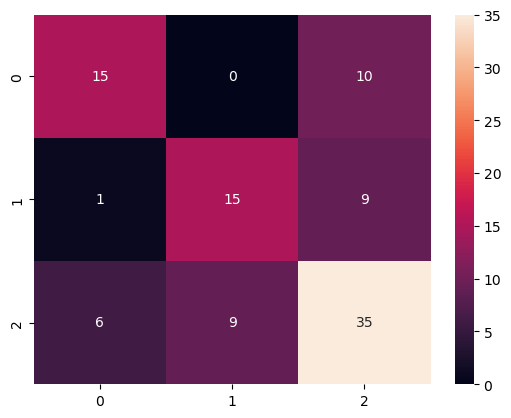

In [77]:
# heatmap for confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='0.0f')

In [78]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.60      0.64        25
           1       0.62      0.60      0.61        25
           2       0.65      0.70      0.67        50

    accuracy                           0.65       100
   macro avg       0.65      0.63      0.64       100
weighted avg       0.65      0.65      0.65       100



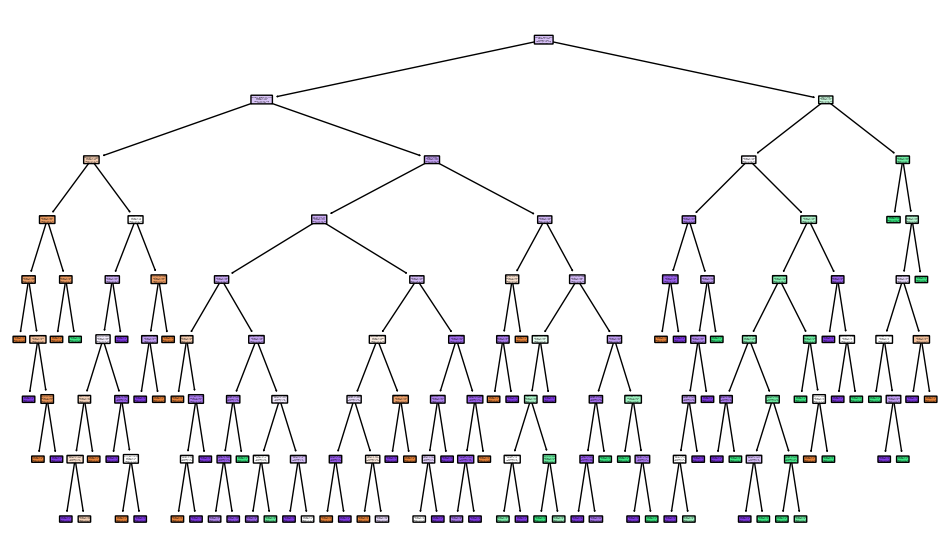

In [100]:
#visualize the decicion score 
plt.figure(figsize=(12,7))
from sklearn.tree import plot_tree
plot_tree(dec_tree,max_depth=10, feature_names=features.columns,class_names=tree1.Sales_cat.values,label='all',filled=True,rounded=True);

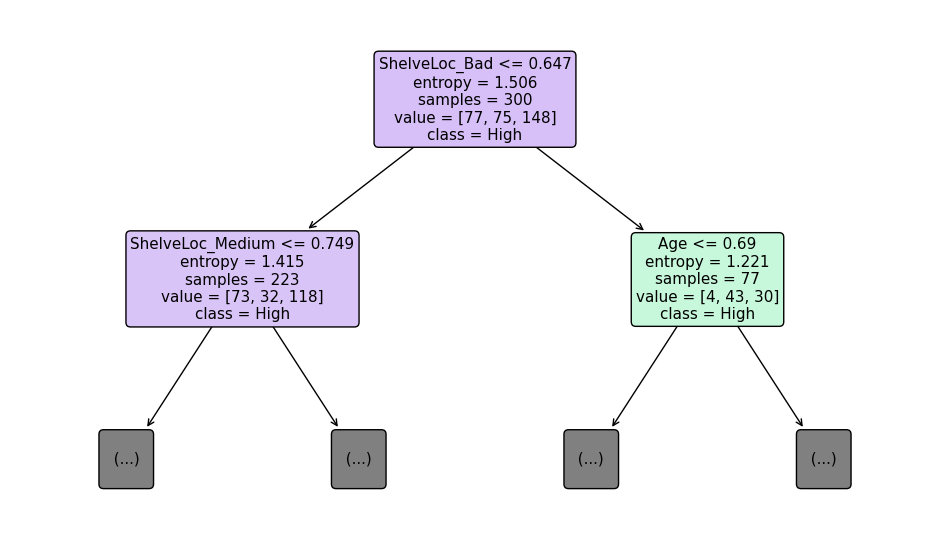

In [103]:
#visualize the decicion score for max depth 1
plt.figure(figsize=(12,7))
from sklearn.tree import plot_tree
plot_tree(dec_tree,max_depth=1, feature_names=features.columns,class_names=tree1.Sales_cat.values,label='all',filled=True,rounded=True);
